In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/Colab Notebooks/CS 520'

/content/drive/MyDrive/Colab Notebooks/CS 520


In [4]:
import pandas

In [5]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
training = pandas.read_csv('adult.csv', names=cols)
testing = pandas.read_csv('test.csv')

In [6]:
def learning(X_train, y_train, X_test, y_test, model):
  model=model.fit(X_train, y_train)
  print('Training set accuracy: ', model.score(X_train, y_train))
  print('Testing set accuracy: ', model.score(X_test, y_test))
  return model

Scaling Numerical Data

In [7]:
X_training_num = training[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
y_training = training['income']

X_testing_num = testing[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
y_testing = testing['income']

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler=scaler.fit(X_training_num)
X_train_scaled=scaler.transform(X_training_num)
X_test_scaled=scaler.transform(X_testing_num)

K-Nearest Neighbors

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

13-NN model performance: 
Training set accuracy:  0.8377199717453395
Testing set accuracy:  0.8161660831644247


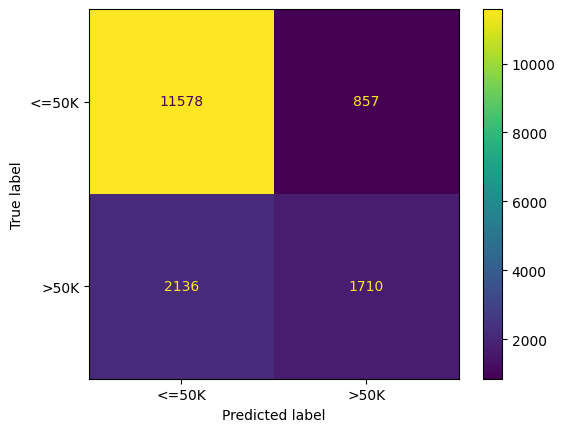

In [10]:
neighbor=KNeighborsClassifier(n_neighbors=13)
print('13-NN model performance: ')
learning(X_train_scaled, y_training, X_test_scaled, y_testing, neighbor)

test_predict=neighbor.predict(X_test_scaled)
metrics.ConfusionMatrixDisplay.from_predictions(y_testing, test_predict)

Decision Tree

Decision Tree model performance: 
Training set accuracy:  0.9987715365007217
Testing set accuracy:  0.7694244825256434


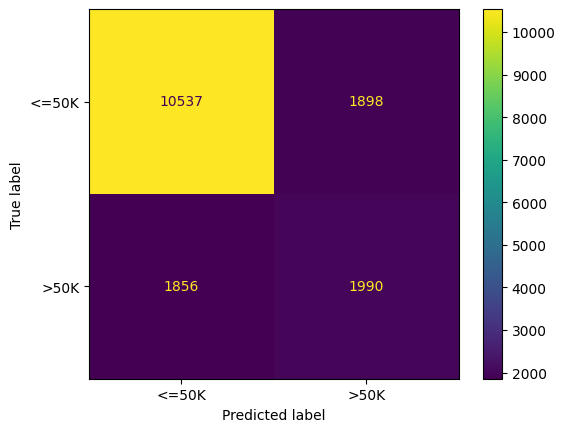

In [11]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
print('Decision Tree model performance: ')
learning(X_train_scaled, y_training, X_test_scaled, y_testing, model)

test_predict=model.predict(X_test_scaled)
metrics.ConfusionMatrixDisplay.from_predictions(y_testing, test_predict)

Random Forest

Random Forest model performance: 
Training set accuracy:  0.9987715365007217
Testing set accuracy:  0.8101467968797985


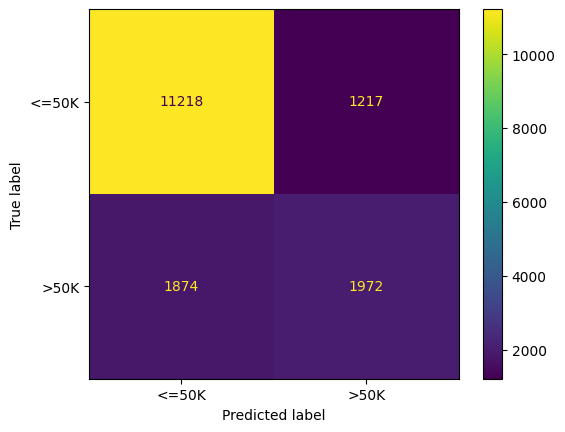

In [12]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
print('Random Forest model performance: ')
learning(X_train_scaled, y_training, X_test_scaled, y_testing, model)

test_predict=model.predict(X_test_scaled)
metrics.ConfusionMatrixDisplay.from_predictions(y_testing, test_predict)

In [13]:
categorical = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
sets = [testing[categorical], training[categorical]]
combined = pandas.concat(sets)

One Hot Encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
ohEn=OneHotEncoder(sparse_output=False)
result=ohEn.fit_transform(combined)

In [16]:
len(X_train_scaled)

32561

In [17]:
training=result[:32561]
testing=result[32561:]

In [22]:
training

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [30]:
train_scaled_df = pandas.DataFrame(X_train_scaled)
test_scaled_df = pandas.DataFrame(X_test_scaled)
training = pandas.DataFrame(training)
testing = pandas.DataFrame(testing)

In [31]:
train_sets=[training, train_scaled_df]
test_sets=[testing, test_scaled_df]
X_train = pandas.concat(train_sets, axis=1)
X_test = pandas.concat(test_sets, axis=1)

Setting Up Models

In [32]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
lg=LogisticRegression(max_iter=1000)
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
models={'Logistic Regression': lg,
        "K-Nearest Neighbors": knn,
        "Decision Tree": dt,
        "Random Forest": rf}

Results from Logistic Regression, K-NN, Decision Tree, and Random Forest with One Hot Encoding and Scaled Numerical Data

Model:  Logistic Regression
Training set accuracy:  0.8159454562206321
Testing set accuracy:  0.8126036484245439
Model:  K-Nearest Neighbors
Training set accuracy:  0.847394121802156
Testing set accuracy:  0.7872980775136662
Model:  Decision Tree
Training set accuracy:  0.9999692884125181
Testing set accuracy:  0.7651864136109575
Model:  Random Forest
Training set accuracy:  0.9999692884125181
Testing set accuracy:  0.8214483139856275


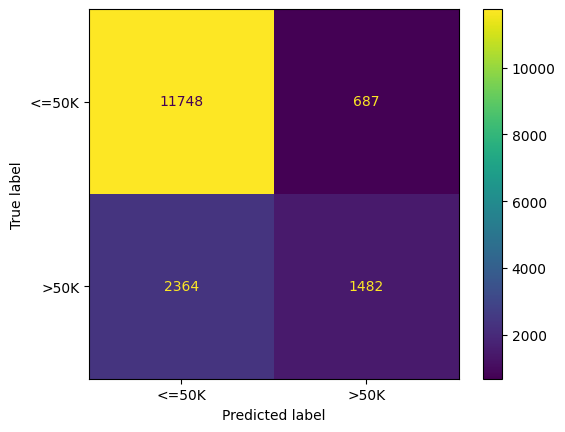

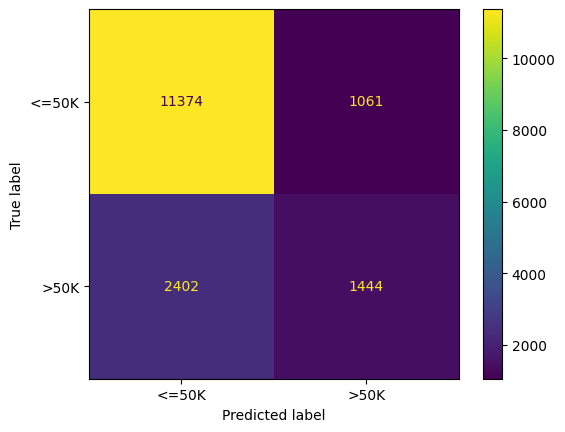

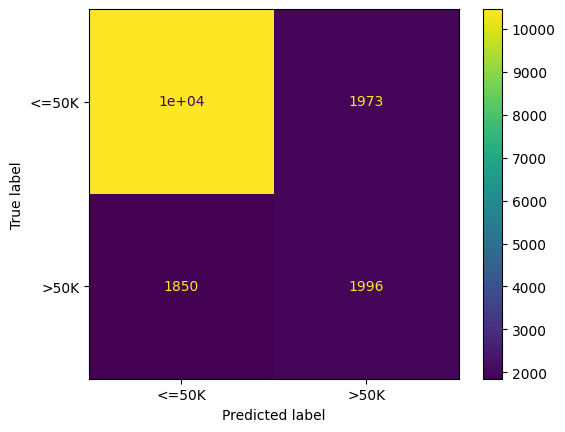

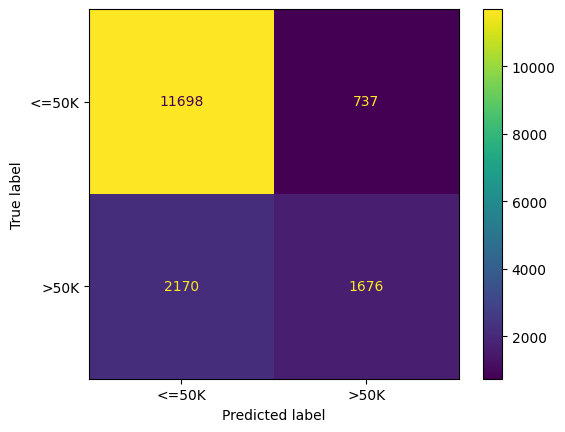

In [36]:
for name in models.keys():
  print("Model: ", name)
  models[name].fit(X_train, y_training)
  print('Training set accuracy: ', models[name].score(X_train, y_training))
  print('Testing set accuracy: ', models[name].score(X_test, y_testing))
  test_predict=models[name].predict(X_test)
  metrics.ConfusionMatrixDisplay.from_predictions(y_testing, test_predict)

Search Parameters

In [41]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [44]:
def search_parameters(model, parameters, X_train, y_train):
  grid=GridSearchCV(model, param_grid=parameters, cv=10)
  grid.fit(X_train, y_train)
  print('Cross Validation Process:')
  display(pandas.DataFrame(grid.cv_results_))
  print('Best Parameters: ', grid.best_params_)
  print('Accuracy on training set using best parameter: ', grid.score(X_train, y_train))

In [46]:
parameters={'C':[0.01, 0.1, 1, 10, 100]}
lg=LogisticRegression(max_iter=1000)
print("Logistic Regression Searching Parameters: ")
search_parameters(lg, parameters, X_train, y_training)

Logistic Regression Searching Parameters: 
Cross Validation Process:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.673566,0.205591,0.021537,0.006686,0.01,{'C': 0.01},0.808720,0.812346,0.813575,0.810811,0.810504,0.808047,0.809889,0.824324,0.821560,0.816953,0.813673,0.005262,5
1,1.293795,0.353374,0.019735,0.004831,0.1,{'C': 0.1},0.809948,0.814496,0.812039,0.813882,0.810197,0.810504,0.811118,0.824324,0.824324,0.818182,0.814901,0.005273,4
2,3.239341,0.990478,0.023922,0.008651,1,{'C': 1},0.810255,0.814803,0.812039,0.813882,0.810197,0.810504,0.811732,0.824939,0.825246,0.817875,0.815147,0.005462,3
3,3.911383,1.102538,0.018517,0.003518,10,{'C': 10},0.810562,0.814496,0.812346,0.813882,0.810197,0.810811,0.812039,0.825246,0.825246,0.817568,0.815239,0.005418,1
4,4.998482,1.144338,0.023214,0.009081,100,{'C': 100},0.810562,0.814496,0.812346,0.813882,0.810504,0.810811,0.812039,0.825246,0.824939,0.817568,0.815239,0.005334,1


Best Parameters:  {'C': 10}
Accuracy on training set using best parameter:  0.8159454562206321


In [47]:
neighs={'n_neighbors': np.arange(1, 16, 1)}
knn=KNeighborsClassifier()
print("Searching K for KNN:")
search_parameters(knn, neighs, X_train, y_training)

Searching K for KNN:
Cross Validation Process:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.122172,0.115223,1.712529,0.826697,1,{'n_neighbors': 1},0.737488,0.743243,0.737101,0.741093,0.734644,0.731572,0.734644,0.756757,0.738943,0.734029,0.738952,0.006793,15
1,0.066237,0.017767,1.292197,0.390370,2,{'n_neighbors': 2},0.783543,0.786241,0.783477,0.787776,0.778870,0.786855,0.780098,0.791769,0.780405,0.779177,0.783821,0.004070,13
2,0.075582,0.021948,1.438950,0.391239,3,{'n_neighbors': 3},0.773411,0.776720,0.775184,0.775799,0.773649,0.774570,0.773956,0.786548,0.773649,0.780405,0.776389,0.003929,14
3,0.069491,0.021828,1.447654,0.420757,4,{'n_neighbors': 4},0.787842,0.791462,0.789312,0.792383,0.790541,0.791155,0.785319,0.799754,0.791155,0.783477,0.790240,0.004183,11
4,0.064607,0.018574,1.385156,0.397964,5,{'n_neighbors': 5},0.778017,0.781941,0.787776,0.789619,0.785627,0.785627,0.782862,0.797912,0.790233,0.792383,0.787200,0.005411,12
5,0.058400,0.011277,1.193119,0.202283,6,{'n_neighbors': 6},0.791219,0.802518,0.789619,0.794840,0.791769,0.789312,0.792998,0.800061,0.793612,0.796376,0.794232,0.004125,9
6,0.069337,0.020168,1.416197,0.430795,7,{'n_neighbors': 7},0.785078,0.797604,0.790541,0.795147,0.791462,0.786241,0.791462,0.801597,0.788391,0.792383,0.791991,0.004800,10
7,0.068853,0.020681,1.454900,0.391891,8,{'n_neighbors': 8},0.790298,0.803133,0.797297,0.800983,0.793612,0.793612,0.791155,0.799754,0.793612,0.796990,0.796045,0.004069,7
8,0.081101,0.043439,1.493219,0.470564,9,{'n_neighbors': 9},0.789684,0.804054,0.794533,0.800061,0.790541,0.793305,0.798526,0.800369,0.791155,0.797297,0.795952,0.004594,8
9,0.057027,0.013763,1.282869,0.341462,10,{'n_neighbors': 10},0.788456,0.800983,0.795762,0.801904,0.793305,0.800676,0.796069,0.806511,0.795762,0.794840,0.797427,0.004872,6


Best Parameters:  {'n_neighbors': 14}
Accuracy on training set using best parameter:  0.8202757900555879


In [48]:
depths={'max_depth':np.arange(1, 10, 1)}
dt=DecisionTreeClassifier()
print("Searching optimal max_depth for decision tree")
search_parameters(dt, depths, X_train, y_training)

Searching optimal max_depth for decision tree
Cross Validation Process:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.072599,0.003392,0.009834,0.001470,1,{'max_depth': 1},0.801965,0.803440,0.799140,0.801904,0.801290,0.804975,0.796683,0.807740,0.805283,0.803747,0.802617,0.003014,8
1,0.091646,0.003269,0.009557,0.000577,2,{'max_depth': 2},0.801965,0.803440,0.799140,0.801904,0.801290,0.804975,0.796683,0.807740,0.805283,0.803747,0.802617,0.003014,8
2,0.114432,0.004512,0.010493,0.001375,3,{'max_depth': 3},0.799816,0.805897,0.800369,0.795762,0.808354,0.807125,0.807125,0.815111,0.807125,0.800369,0.804705,0.005311,7
3,0.138149,0.004779,0.010243,0.001405,4,{'max_depth': 4},0.819159,0.821560,0.812654,0.820025,0.816339,0.821253,0.808968,0.822482,0.816953,0.824017,0.818341,0.004448,6
4,0.266014,0.133963,0.019339,0.013427,5,{'max_depth': 5},0.825299,0.837531,0.830467,0.824017,0.829238,0.839373,0.828010,0.838452,0.835995,0.830160,0.831854,0.005294,3
5,0.456676,0.176179,0.022359,0.012535,6,{'max_depth': 6},0.824685,0.839066,0.830467,0.825246,0.828317,0.840295,0.828317,0.838452,0.834459,0.831695,0.832100,0.005432,2
6,0.271869,0.062598,0.012701,0.003978,7,{'max_depth': 7},0.827142,0.836916,0.835688,0.830160,0.832002,0.832310,0.828317,0.837838,0.830160,0.832617,0.832315,0.003395,1
7,0.244455,0.008115,0.009665,0.001064,8,{'max_depth': 8},0.822229,0.830160,0.834767,0.826474,0.828317,0.836302,0.827396,0.837224,0.832310,0.830467,0.830564,0.004466,5
8,0.274846,0.011024,0.009800,0.000872,9,{'max_depth': 9},0.821615,0.829853,0.835995,0.829238,0.828317,0.837531,0.824324,0.838145,0.831695,0.833231,0.830994,0.005180,4


Best Parameters:  {'max_depth': 7}
Accuracy on training set using best parameter:  0.8363379503086514


In [50]:
forests={'n_estimators': [50, 100, 150, 200], 'max_depth': np.arange(1, 6, 1)}

rf=RandomForestClassifier(random_state=42)
search_parameters(rf, forests, X_train, y_training)

Cross Validation Process:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.903158,0.419439,0.062789,0.053384,1,50,"{'max_depth': 1, 'n_estimators': 50}",0.758981,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759190,0.000070,15
1,0.688581,0.010507,0.032713,0.003007,1,100,"{'max_depth': 1, 'n_estimators': 100}",0.758981,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759190,0.000070,15
2,1.253188,0.237627,0.050251,0.012046,1,150,"{'max_depth': 1, 'n_estimators': 150}",0.758981,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759190,0.000070,15
3,2.067503,0.737175,0.072415,0.024587,1,200,"{'max_depth': 1, 'n_estimators': 200}",0.758981,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759190,0.000070,15
4,0.554814,0.127261,0.026096,0.006382,2,50,"{'max_depth': 2, 'n_estimators': 50}",0.759902,0.759521,0.759828,0.760135,0.760749,0.759521,0.759828,0.759214,0.760135,0.759828,0.759866,0.000399,13
5,1.112095,0.233769,0.043420,0.010356,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.759288,0.759521,0.759828,0.759521,0.760442,0.759521,0.759214,0.759521,0.760749,0.759214,0.759682,0.000494,14
6,1.518540,0.329474,0.050931,0.010540,2,150,"{'max_depth': 2, 'n_estimators': 150}",0.758981,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759190,0.000070,15
7,2.026259,0.359606,0.070014,0.015714,2,200,"{'max_depth': 2, 'n_estimators': 200}",0.758981,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759214,0.759190,0.000070,15
8,1.476933,0.543949,0.087201,0.067772,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.785999,0.781634,0.786548,0.789926,0.786548,0.789312,0.780713,0.794226,0.785012,0.787162,0.786708,0.003728,9
9,1.655070,0.931377,0.056812,0.042034,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.776174,0.777948,0.780098,0.779791,0.785627,0.784398,0.778563,0.790233,0.781020,0.782862,0.781671,0.003975,10


Best Parameters:  {'max_depth': 5, 'n_estimators': 50}
Accuracy on training set using best parameter:  0.8076226160130218


Testing Sets on Best Parameters

In [54]:
def learning(X_train, y_train, X_test, y_test, model):
  model=model.fit(X_train, y_train)
  print('Training set accuracy: ', model.score(X_train, y_train))
  print('Testing set accuracy: ', model.score(X_test, y_test))
  return model

Logistic Regression

In [55]:
lg = LogisticRegression(max_iter=1000, C=10)
learning(X_train, y_training, X_test, y_testing, lg)

Training set accuracy:  0.8159454562206321
Testing set accuracy:  0.8123579632700694


LogisticRegression(C=10, max_iter=1000)

K-NN

In [56]:
knn = KNeighborsClassifier(n_neighbors=14)
learning(X_train, y_training, X_test, y_testing, knn)

Training set accuracy:  0.8202757900555879
Testing set accuracy:  0.804004668017935


KNeighborsClassifier(n_neighbors=14)

Decision Tree

In [57]:
dt=DecisionTreeClassifier(max_depth=7)
learning(X_train, y_training, X_test, y_testing, dt)

Training set accuracy:  0.8363379503086514
Testing set accuracy:  0.8329955162459308


DecisionTreeClassifier(max_depth=7)

Random Forest

In [58]:
rf=RandomForestClassifier(random_state=42, max_depth=5, n_estimators=50)
learning(X_train, y_training, X_test, y_testing, rf)

Training set accuracy:  0.8076226160130218
Testing set accuracy:  0.8087955285301885


RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

The OHE implementation has increased the accuracy by 2% when comparing the decision tree with a max_depth of 7 using the OHE test set to the results from the logistic regression of the scaled dataset.
It is interesting to note that the logistic regression with the OHE set has essentially the same accuracy as the scaled dataset.